In [27]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

In [2]:
import tensorflow as tf

In [5]:
from tensorflow.keras import Sequential

In [4]:
from tensorflow.keras.layers import Dense, Input

In [6]:
from tensorflow.keras.optimizers import Adam

In [68]:
from sklearn.preprocessing import Normalizer

In [8]:
from sklearn.model_selection import train_test_split

In [55]:
import numpy as np

In [9]:
df = pd.read_csv("IRIS.csv")

In [15]:
entradas = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

In [23]:
saida = df[["species"]].replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

<ipython-input-23-c9d9c5f2337e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  saida = df[["species"]].replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})


In [69]:
normalizador = Normalizer().fit(entradas)

In [71]:
x_normalizado = normalizador.transform(entradas)
x_normalizado

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [72]:
train_x, test_x, train_y, test_y = train_test_split(x_normalizado, saida, test_size=0.2)

In [74]:
modelo = Sequential()
modelo.add( Input( (4, ) ))
modelo.add( Dense(  16, activation="relu" ))
modelo.add( Dense( 8, activation="relu"))
modelo.add( Dense( 3, activation="softmax"))
modelo.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
adam = Adam(learning_rate = 0.01)
modelo.compile(optimizer=adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [50]:
resultado = modelo.fit(train_x, train_y, epochs=20)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9775 - loss: 0.0387 
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9679 - loss: 0.0432 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9827 - loss: 0.0454 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9733 - loss: 0.0452 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9785 - loss: 0.0428 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9712 - loss: 0.0559 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9785 - loss: 0.0399 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9879 - loss: 0.0344 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9596 - loss: 0.0542 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9704 - loss: 0.0778 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9731 - loss: 0.0378 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9765 - loss: 0.0485 
E

In [45]:
resultado.history

{'accuracy': [0.9666666388511658,
  0.9666666388511658,
  0.9583333134651184,
  0.9666666388511658,
  0.9750000238418579,
  0.9750000238418579,
  0.9666666388511658,
  0.9666666388511658,
  0.9750000238418579,
  0.9750000238418579,
  0.9583333134651184,
  0.9750000238418579,
  0.9750000238418579,
  0.9666666388511658,
  0.9750000238418579,
  0.9666666388511658,
  0.9666666388511658,
  0.9666666388511658,
  0.9583333134651184,
  0.9666666388511658,
  0.9750000238418579,
  0.9666666388511658,
  0.9750000238418579,
  0.9750000238418579,
  0.9833333492279053,
  0.9833333492279053,
  0.9750000238418579,
  0.9583333134651184,
  0.9666666388511658,
  0.9750000238418579,
  0.9666666388511658,
  0.9666666388511658,
  0.9666666388511658,
  0.9833333492279053,
  0.9750000238418579,
  0.9666666388511658,
  0.9750000238418579,
  0.9666666388511658,
  0.9666666388511658,
  0.9666666388511658,
  0.9750000238418579,
  0.9750000238418579,
  0.9750000238418579,
  0.9666666388511658,
  0.9750000238418579

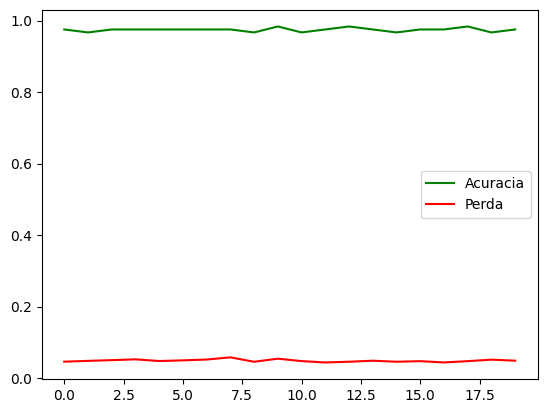

In [51]:
plt.plot(resultado.history["accuracy"], color="g", label="Acuracia")
plt.plot(resultado.history["loss"], color="r", label="Perda")
plt.legend()
plt.show()

In [52]:
teste = modelo.evaluate(test_x, test_y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.9333 - loss: 0.2323


In [58]:
np.round( modelo.predict( np.array([[0.2, 0.7, 0.6, 0.1]]) ) )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0., 0., 1.]], dtype=float32)